In [1]:
import pandas as pd

# Note: bank.csv often uses ';' as delimiter
df = pd.read_csv("bank.csv", delimiter=";")

print(df.head())
print(df.info())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

In [2]:
df2 = df[['y', 'job', 'marital', 'default', 'housing', 'poutcome']]
print(df2.head())

    y          job  marital default housing poutcome
0  no   unemployed  married      no      no  unknown
1  no     services  married      no     yes  failure
2  no   management   single      no     yes  failure
3  no   management  married      no     yes  unknown
4  no  blue-collar  married      no     yes  unknown


In [3]:
df3 = pd.get_dummies(df2, columns=['job','marital','default','housing','poutcome'])
print(df3.head())

    y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  no       False            False             False          False   
1  no       False            False             False          False   
2  no       False            False             False          False   
3  no       False            False             False          False   
4  no       False             True             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2            True        False              False         False        False   
3            True        False              False         False        False   
4           False        False              False         False        False   

   ...  marital_married  marital_single  default_no  default_yes  housing_no  \
0  ...      

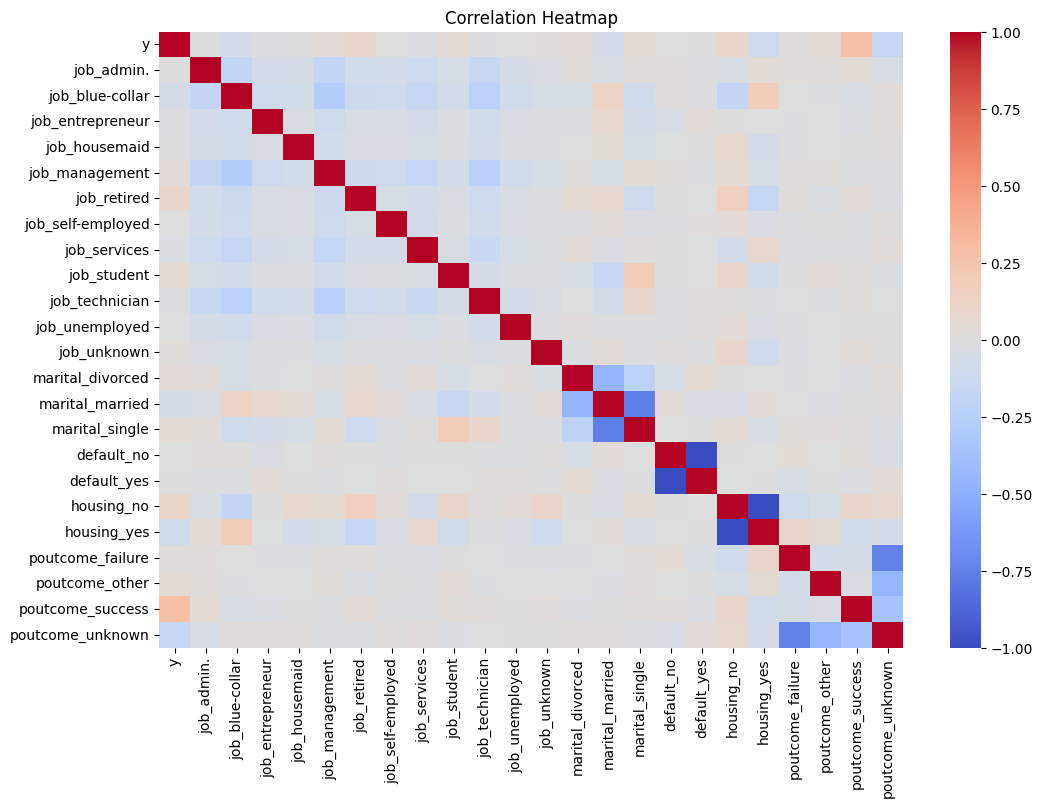

In [6]:
# Convert y column to numeric (yes=1, no=0)
df3['y'] = df3['y'].map({'yes': 1, 'no': 0})

# Now correlation will work
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df3.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
print("df3 shape:", df3.shape)
print("Unique values in y:", df3['y'].unique())
print("y counts:", df3['y'].value_counts(dropna=False))

df3 shape: (0, 24)
Unique values in y: []
y counts: Series([], Name: count, dtype: int64)


In [25]:
# Reload from df2 to be safe
df2 = df[['y','job','marital','default','housing','poutcome']]

# Keep only rows with yes/no
df2 = df2[df2['y'].isin(['yes','no'])]

# One-hot encode categorical variables
df3 = pd.get_dummies(df2, columns=['job','marital','default','housing','poutcome'])

# Map y to numeric
df3['y'] = df3['y'].map({'yes':1, 'no':0})

print("df3 shape after cleaning:", df3.shape)
print("y counts:", df3['y'].value_counts())

df3 shape after cleaning: (4521, 24)
y counts: y
0    4000
1     521
Name: count, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split

X = df3.drop('y', axis=1)
y = df3['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train:", y_train.value_counts())
print("Test:", y_test.value_counts())

Train: y
0    2999
1     391
Name: count, dtype: int64
Test: y
0    1001
1     130
Name: count, dtype: int64


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy Score: 0.887709991158267
Confusion Matrix:
 [[987  14]
 [113  17]]


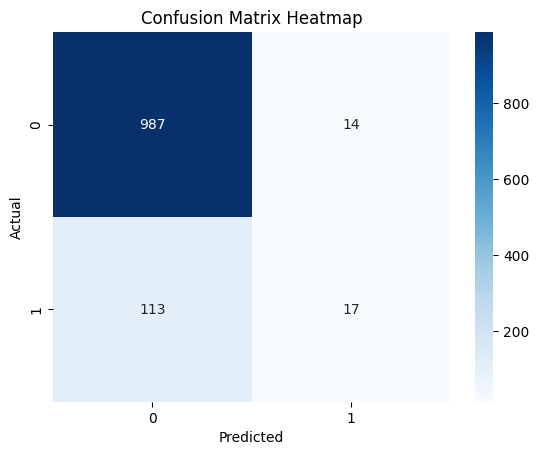

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1001
           1       0.55      0.13      0.21       130

    accuracy                           0.89      1131
   macro avg       0.72      0.56      0.58      1131
weighted avg       0.86      0.89      0.86      1131



In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))